In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import time
from IPython.display import clear_output


In [ ]:
#Generate Synthetic Streaming Data

In [2]:
def generate_data(num_points=1):
    # Generate normal data and some random outliers
    normal_data = np.random.normal(loc=50, scale=5, size=(num_points, 2))
    outlier_data = np.random.uniform(low=0, high=100, size=(int(num_points * 0.1), 2))
    data = np.vstack((normal_data, outlier_data))
    np.random.shuffle(data)
    return pd.DataFrame(data, columns=['feature1', 'feature2'])


In [ ]:
#Define Outlier Detection Function Using Z-Score

In [3]:
def detect_outliers_zscore(data, threshold=3.0):
    # Calculate Z-scores for each feature
    z_scores = data.apply(zscore)
    # Mark data points as outliers if any Z-score exceeds the threshold
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    data['is_outlier'] = outliers
    return data


In [ ]:
 #Stream Data and Detect Outliers in Real-Time

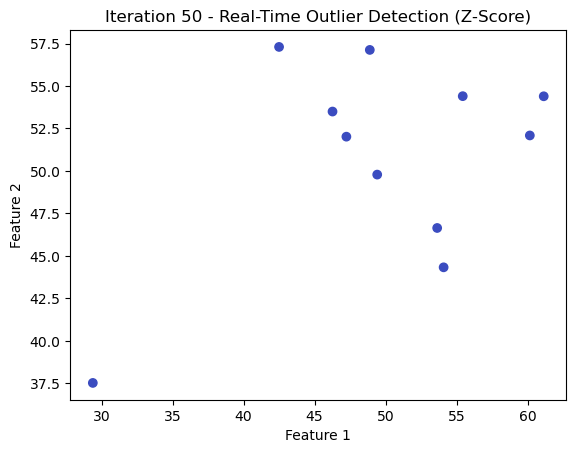

In [5]:
def stream_and_detect_outliers_zscore(num_iterations=50, points_per_iteration=10, zscore_threshold=3.0):
    for i in range(num_iterations):
        # Generate new data points (simulate streaming data)
        new_data = generate_data(points_per_iteration)
        
        # Detect outliers using Z-score
        analyzed_data = detect_outliers_zscore(new_data, threshold=zscore_threshold)
        
        # Display the new data points with outliers highlighted
        clear_output(wait=True)
        plt.scatter(analyzed_data['feature1'], analyzed_data['feature2'], 
                    c=analyzed_data['is_outlier'], cmap='coolwarm', marker='o')
        plt.title(f"Iteration {i+1} - Real-Time Outlier Detection (Z-Score)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()
        
        # Pause to simulate real-time streaming
        time.sleep(1)

# Run the streaming detection
stream_and_detect_outliers_zscore()
